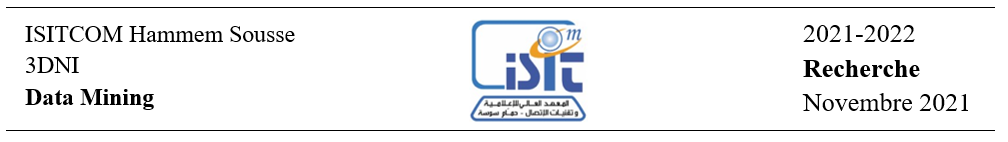

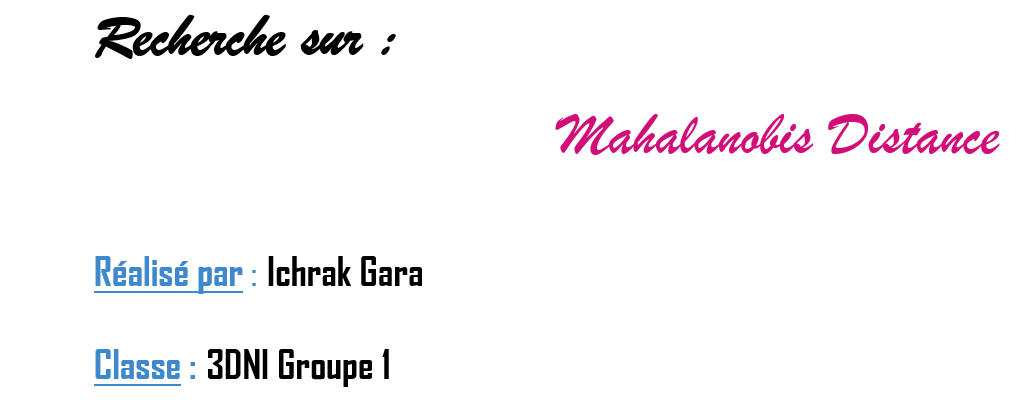

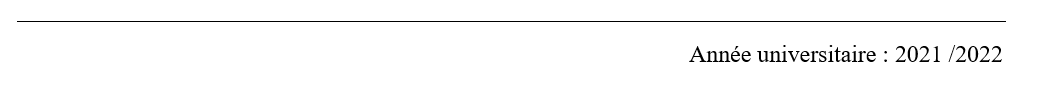

# <span style="color:	purple ">I. Qu'est-ce que la distance de Mahalanobis ?</span>

#### La distance de Mahalonobis est la distance entre un point et une distribution. Et non entre deux points distincts. C'est effectivement un équivalent multivarié de la distance euclidienne.
#### Il a été introduit par le professeur PC Mahalanobis en 1936 et a été utilisé dans diverses applications statistiques depuis lors. Cependant, il n'est pas si bien connu ou utilisé dans la pratique de l'apprentissage automatique.
#### Donc, d'un point de vue informatique, en quoi la distance de Mahalanobis est-elle différente de la distance euclidienne ?
- **`1.`**Il transforme les colonnes en variables non corrélées
- **`2.`**Mettez les colonnes à l'échelle pour que leur variance soit égale à 1
- **`3.`**Enfin, il calcule la distance euclidienne


# <span style="color:	purple ">II. Les mathématiques et l'intuition derrière Mahalanobis Distance</span>

#### La formule pour calculer la distance de Mahalanobis est la suivante :

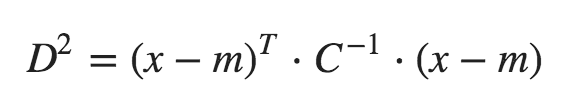

#### Avec:
- **`D^2`**est le carré de la distance de Mahalanobis
- **`x`**est le vecteur de l'observation ( ligne dans un jeu de données )
- **`m`**est le vecteur des valeurs moyennes des variables indépendantes ( moyenne de chaque colonne )
- **`C^(-1)`**est la matrice de covariance inverse de variables indépendantes.

# <span style="color:	purple ">III. Calcule de la Distance de Mahalanobis en Python</span>

les étapes suivantes sont utilisées pour calculer la distance de Mahalanobis pour chaque observation dans un ensemble de données en Python.

### <span style="color:	#439EA9 ">Étape 1 : Création de l'ensemble de données</span>

Tout d'abord, nous allons créer un ensemble de données qui affiche le score d'examen de 20 étudiants ainsi que le nombre d'heures qu'ils ont passé à étudier, le nombre d'examens de préparation qu'ils ont passés et leur note actuelle dans le cours :

In [21]:
import numpy as np
import pandas as pd 
import scipy as stats

data = {'score': [91, 93, 72, 87, 86, 73, 68, 87, 78, 99, 95, 76, 84, 96, 76, 80, 83, 84, 73, 74],
        'hours': [16, 6, 3, 1, 2, 3, 2, 5, 2, 5, 2, 3, 4, 3, 3, 3, 4, 3, 4, 4],
        'prep': [3, 4, 0, 3, 4, 0, 1, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2],
        'grade': [70, 88, 80, 83, 88, 84, 78, 94, 90, 93, 89, 82, 95, 94, 81, 93, 93, 90, 89, 89]
        }

df = pd.DataFrame(data,columns=['score', 'hours', 'prep','grade'])
#affiche les cinq premières lignes du dataframe
df.head()

,score,hours,prep,grade
0,91,16,3,70
1,93,6,4,88
2,72,3,0,80
3,87,1,3,83
4,86,2,4,88


### <span style="color:	#439EA9 ">Étape 2 : Calcule de la distance de Mahalanobis pour chaque observation</span>

Ensuite, nous écrirons une fonction courte pour calculer la distance de Mahalanobis.

In [22]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#créer une nouvelle colonne dans le dataframe qui contient la distance de Mahalanobis pour chaque ligne 
df['mahalanobis_Distance'] = mahalanobis(x=df, data=df[['score', 'hours', 'prep', 'grade']])

#affiche les cinq premières lignes du dataframe
df.head()

,score,hours,prep,grade,mahalanobis_Distance
0,91,16,3,70,16.501963
1,93,6,4,88,2.639286
2,72,3,0,80,4.850797
3,87,1,3,83,5.201261
4,86,2,4,88,3.828734


# <span style="color:	purple ">VI. les cas d'utilisation de la distance de mahalanobis</span>

## <span style="color:	#439EA9 ">Cas d'utilisation 1 : détection des valeurs aberrantes multivariées à l'aide de la distance de Mahalanobis</span>

Nous pouvons voir que certaines des distances de Mahalanobis sont beaucoup plus grandes que d'autres. Pour déterminer si l'une des distances est statistiquement significative, nous devons calculer leurs valeurs p.

La valeur p pour chaque distance est calculée comme la valeur p qui correspond à la statistique du Khi deux de la distance de Mahalanobis avec k-1 degrés de liberté, où k = nombre de variables. Donc, dans ce cas, nous utiliserons un degré de liberté de 4-1 = 3.

### <span style="color:	#06536E ">Exemple</span>

In [23]:
from scipy.stats import chi2

#calculer la valeur p pour chaque distance mahalanobis
df['p'] = 1 - chi2.cdf(df['mahalanobis_Distance'], 3)

#afficher les valeurs p pour les cinq premières lignes du dataframe
df.head()

,score,hours,prep,grade,mahalanobis_Distance,p
0,91,16,3,70,16.501963,0.000895
1,93,6,4,88,2.639286,0.450644
2,72,3,0,80,4.850797,0.183054
3,87,1,3,83,5.201261,0.157639
4,86,2,4,88,3.828734,0.280562


### En règle générale, une valeur p  inférieure à 0,001  est considérée comme une valeur aberrante. Nous pouvons voir que la première observation est une valeur aberrante dans l'ensemble de données car elle a une valeur p inférieure à 0,001.

## <span style="color:	#439EA9 ">Cas d'utilisation 2 : Classification à une classe</span>

La classification à une classe est un type d'algorithme dans lequel l'ensemble de données d'apprentissage contient des observations appartenant à une seule classe.

Avec seulement cette information connue, l'objectif est de déterminer si une observation donnée dans un nouvel ensemble de données (ou de test) appartient à cette classe.

Vous pourriez vous demander quand une telle situation se produirait. Eh bien, c'est un problème assez courant en Data Science.

Par exemple, considérons la situation suivante : Vous disposez d'un grand ensemble de données contenant des millions d'enregistrements qui ne sont PAS encore classés en 1 et en 0. Mais vous avez également avec vous un petit échantillon de données contenant uniquement des enregistrements positifs. En apprenant les informations de cet exemple de jeu de données, vous souhaitez classer tous les enregistrements du grand jeu de données en 1 et en 0.

Sur la base des informations de l'ensemble de données de l'échantillon, il est possible de dire si un échantillon donné est un 1 ou un 0 en ne visualisant que les 1 (et en n'ayant aucune connaissance des 0).

Cela peut être fait en utilisant la distance de Mahalanobis.

### <span style="color:	#06536E ">Exemple</span>

nous essayons sur l' BreastCancer ensemble de données, mais cette fois, nous ne considérerons que les observations malignes (colonne de classe = 1) dans les données d'apprentissage.

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv', 
                 usecols=['Cl.thickness', 'Cell.size', 'Marg.adhesion', 
                          'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 
                          'Mitoses', 'Class'])

df.dropna(inplace=True)  # drop missing values.

Diviser 50 % de l'ensemble de données en entraînement et test. Seuls les 1 sont conservés dans les données d'entraînement.

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=.5, random_state=100)

# Split the training data as pos and neg
xtrain_pos = xtrain.loc[ytrain == 1, :]

Construisons le MahalanobisOneClassClassifieret obtenons la distance mahalanobis de chaque point de données en x à partir de l'ensemble d'apprentissage ( xtrain_pos).

In [26]:
class MahalanobisOneclassClassifier():
    def __init__(self, xtrain, significance_level=0.01):
        self.xtrain = xtrain
        self.critical_value = chi2.ppf((1-significance_level), df=xtrain.shape[1]-1)
        print('Critical value is: ', self.critical_value)

    def predict_proba(self, xtest):
        mahalanobis_dist = mahalanobis(xtest, self.xtrain)
        self.pvalues = 1 - chi2.cdf(mahalanobis_dist, 2)
        return mahalanobis_dist

    def predict(self, xtest):
        return np.array([int(i) for i in self.predict_proba(xtest) > self.critical_value])

clf = MahalanobisOneclassClassifier(xtrain_pos, significance_level=0.05)
mahalanobis_dist = clf.predict_proba(xtest)

# Pred and Truth
mdist_actuals = pd.DataFrame([(m, act) for m, act in zip(mahalanobis_dist, ytest)], columns=['mahal', 'true_class'])
print(mdist_actuals[:5])     

Critical value is:  14.067140449340169
       mahal  true_class
0  13.104716           0
1  14.408570           1
2  14.932236           0
3  14.588622           0
4  15.471064           0


Nous avons la distance de Mahalanobis et la classe réelle de chaque observation.

# <span style="color:	purple ">V. Conclusion</span>

### Dans cette recherche, nous avons couvert presque tout sur la distance de Mahalanobis : l'intuition derrière la formule, le calcul réel en python et comment elle peut être utilisée pour la détection d'anomalies multivariées et la classification à une classe.